In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
np.random.seed(42)

In [106]:
# 1) load data:
df = pd.read_csv("dataset/heart_attack_dataset.csv")
# 2) view sample from the data
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,male,NaN,140,241,0,1,123,1,0.2,1.0,NaN,3.0,no
299,299,45,female,3.0,110,264,0,1,132,0,1.2,1.0,NaN,3.0,no
300,300,68,female,0.0,144,193,1,1,141,0,3.4,1.0,2.0,3.0,no
301,301,57,female,0.0,130,131,0,1,115,1,1.2,1.0,1.0,3.0,no
302,302,57,male,1.0,130,236,0,0,174,0,0.0,1.0,1.0,2.0,no


In [21]:
# 2) drop unwanted record:
df.drop("Unnamed: 0",axis=1, inplace=True)


In [22]:
# 3) handle missing data:
# return the num of missing data in each record
df.isna().sum()

age         0
sex         0
cp          5
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       1
ca          5
thal        1
target      0
dtype: int64

In [23]:
df["cp"].fillna(df["cp"].mean(),inplace = True)


In [24]:
# INPLACE = true ==> make the change in the variable, 
#false ==> remain the variable the same and update the change in new variable
df["ca"].fillna(df["ca"].mean(),inplace = True)


In [25]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       1
ca          0
thal        1
target      0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     302 non-null    float64
 11  ca        303 non-null    float64
 12  thal      302 non-null    float64
 13  target    303 non-null    object 
dtypes: float64(5), int64(7), object(2)
memory usage: 33.3+ KB


In [27]:
# HOW = all ==> if all cells in row is nan, any ==> if any of the cells in the row are nan
df.dropna(how="any", inplace=True)


In [28]:
# change datatype 
df = df.astype({"age":np.uint8})

<AxesSubplot:xlabel='sex', ylabel='cp'>

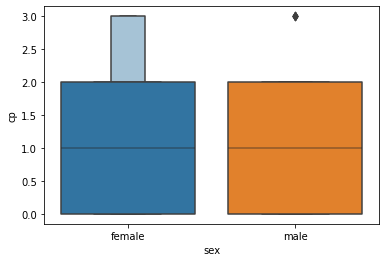

In [29]:
sns.boxenplot(x="sex",y="cp",data=df)

In [30]:
# 4) map labeled data to numbers:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [31]:
df["sex"] = df["sex"].map({"female":1,"male":0})


In [32]:
df["target"] = df["target"].map({"yes":1,"no":0})


In [33]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233,1,0,150,0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130,250,0,1,187,0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130,204,0,0,172,0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120,236,0,1,178,0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120,354,0,1,163,1,0.6,2.0,0.0,2.0,1


In [34]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094256,-0.070304,0.279611,0.213956,0.118937,-0.110735,-0.406065,0.107779,0.219574,-0.181781,0.281613,0.064144,-0.234718
sex,-0.094256,1.000000,-0.050425,-0.056499,-0.198919,0.047021,-0.062528,-0.040708,0.136313,0.091731,-0.024360,0.117723,0.214785,-0.277520
cp,-0.070304,-0.050425,1.000000,0.040752,-0.077572,0.096331,0.056000,0.289104,-0.373016,-0.140347,0.109356,-0.168465,-0.158936,0.418493
trestbps,0.279611,-0.056499,0.040752,1.000000,0.118804,0.177572,-0.113981,-0.045376,0.069051,0.196624,-0.126760,0.099525,0.056338,-0.146349
chol,0.213956,-0.198919,-0.077572,0.118804,1.000000,0.013047,-0.151675,-0.005862,0.069083,0.059375,-0.012773,0.061598,0.084931,-0.087009
fbs,0.118937,0.047021,0.096331,0.177572,0.013047,1.000000,-0.081962,-0.010746,0.029871,0.008810,-0.064590,0.136611,-0.033792,-0.031222
restecg,-0.110735,-0.062528,0.056000,-0.113981,-0.151675,-0.081962,1.000000,0.049006,-0.080071,-0.065740,0.103011,-0.072326,-0.009030,0.144724
thalach,-0.406065,-0.040708,0.289104,-0.045376,-0.005862,-0.010746,0.049006,1.000000,-0.375105,-0.342652,0.386818,-0.214925,-0.094596,0.419009
exang,0.107779,0.136313,-0.373016,0.069051,0.069083,0.029871,-0.080071,-0.375105,1.000000,0.281053,-0.247802,0.114848,0.215209,-0.430992
oldpeak,0.219574,0.091731,-0.140347,0.196624,0.059375,0.008810,-0.065740,-0.342652,0.281053,1.000000,-0.572582,0.224073,0.221771,-0.426427


<AxesSubplot:>

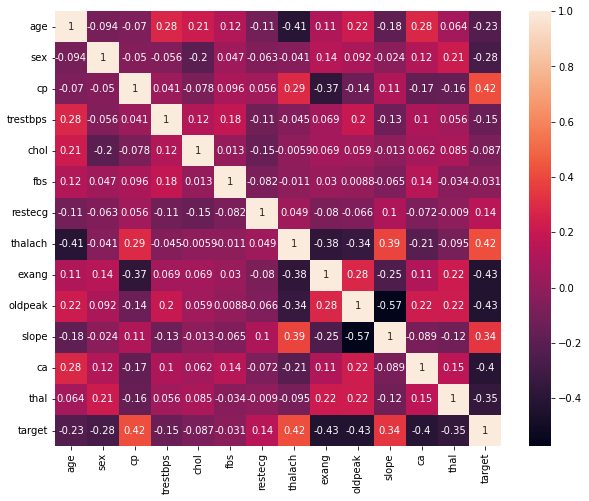

In [35]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr(),annot=True)

In [36]:
feature = df.drop(["target"],axis=1)
target = df["target"]

In [37]:
cols = df.drop("target",axis=1).columns


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature)
sacled_feature = pd.DataFrame(scaled_data,columns=cols)
sacled_feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
feature_pca = pca.fit_transform(sacled_feature)
print(feature_pca)

[[-0.15265834 -0.44736606  1.14558939 ...  0.00293539  0.11386686
  -0.02812733]
 [-0.12730876 -0.38400369  0.00701098 ...  0.09901025  0.16430651
   0.05125542]
 [-0.66186587  0.41664085 -0.16919373 ...  0.2324171  -0.09543943
  -0.09061785]
 ...
 [ 0.22302443 -0.32061713  0.7891651  ...  0.19500791  0.0496703
  -0.16761639]
 [ 0.86099077  0.07113523 -0.23267275 ... -0.07242358 -0.19861972
  -0.18223166]
 [-0.53815443  0.50390643  0.00612075 ... -0.2206904   0.07156016
  -0.11710607]]


In [110]:
feature_pca = pd.DataFrame(feature_pca,columns=cols)
feature_pca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach
0,-0.152658,-0.447366,1.145589,0.479233,0.436549,-0.088528,-0.372326,0.357834
1,-0.127309,-0.384004,0.007011,0.666577,0.472789,0.335659,-0.343528,0.008960
2,-0.661866,0.416641,-0.169194,-0.138234,-0.073358,-0.301159,-0.165261,-0.074258
3,-0.269234,-0.446912,-0.292046,-0.158523,-0.049692,0.162892,-0.065428,0.051533
4,0.171538,0.887897,-0.315450,-0.565798,0.042111,0.111023,-0.014709,0.022346
...,...,...,...,...,...,...,...,...
296,0.278439,0.891651,-0.074580,-0.095396,0.317405,0.196307,0.161265,-0.152958
297,-0.267581,-0.512352,-0.010332,0.317693,0.508903,0.227983,0.160337,-0.140205
298,0.223024,-0.320617,0.789165,0.242786,-0.600911,0.476491,0.027852,-0.181945
299,0.860991,0.071135,-0.232673,0.005704,0.055872,0.294684,0.044207,-0.026718


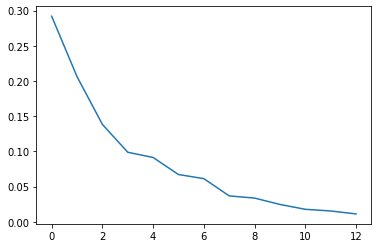

In [41]:
plt.plot(pca.explained_variance_)

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
feature_pca = pca.fit_transform(sacled_feature)
print(feature_pca)

[[-0.15265834 -0.44736606  1.14558939 ... -0.08852828 -0.37232613
   0.35783394]
 [-0.12730876 -0.38400369  0.00701098 ...  0.33565914 -0.34352824
   0.00895964]
 [-0.66186587  0.41664085 -0.16919373 ... -0.30115872 -0.16526076
  -0.07425815]
 ...
 [ 0.22302443 -0.32061713  0.7891651  ...  0.47649148  0.02785201
  -0.18194514]
 [ 0.86099077  0.07113523 -0.23267275 ...  0.29468398  0.04420699
  -0.02671813]
 [-0.53815443  0.50390643  0.00612075 ... -0.26092606 -0.04027172
   0.04080425]]


In [99]:
cols =["age","sex","cp","trestbps","chol","fbs","restecg","thalach"]
feature_pca = pd.DataFrame(feature_pca,columns=cols)
feature_pca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach
0,-0.152658,-0.447366,1.145589,0.479233,0.436549,-0.088528,-0.372326,0.357834
1,-0.127309,-0.384004,0.007011,0.666577,0.472789,0.335659,-0.343528,0.008960
2,-0.661866,0.416641,-0.169194,-0.138234,-0.073358,-0.301159,-0.165261,-0.074258
3,-0.269234,-0.446912,-0.292046,-0.158523,-0.049692,0.162892,-0.065428,0.051533
4,0.171538,0.887897,-0.315450,-0.565798,0.042111,0.111023,-0.014709,0.022346
...,...,...,...,...,...,...,...,...
296,0.278439,0.891651,-0.074580,-0.095396,0.317405,0.196307,0.161265,-0.152958
297,-0.267581,-0.512352,-0.010332,0.317693,0.508903,0.227983,0.160337,-0.140205
298,0.223024,-0.320617,0.789165,0.242786,-0.600911,0.476491,0.027852,-0.181945
299,0.860991,0.071135,-0.232673,0.005704,0.055872,0.294684,0.044207,-0.026718


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(feature_pca,target,test_size=0.2)

In [78]:
clf =SVC(kernel="linear", C=1)
clf.fit(x_train,y_train)


SVC(C=1, kernel='linear')

In [79]:
clf.score(x_test,y_test)

0.7704918032786885

In [80]:
from sklearn.metrics import accuracy_score
y_predected = clf.predict(x_test)
accuracy_score(y_predected, y_test)

0.7704918032786885

In [81]:
#7) choose model (estimator):
from sklearn import svm
#8) tune model prams(do this step when accuracy is not the best ):
from sklearn.model_selection import GridSearchCV
prams = {"kernel": ["linear", "rbf"], "C": [0.5,0.3,1], "gamma": [ 0.1,0.2]} # c ==> separation between supported victors
grid = GridSearchCV(svm.SVC(), prams, verbose=2,cv=5)

In [82]:
print(grid.fit(feature_pca, target))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.2, k

In [83]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.8371584699453554


In [84]:
clf = svm.SVC(kernel="linear", C=1)

In [85]:
clf.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [86]:
from sklearn.metrics import accuracy_score
y_predected = clf.predict(x_test)
accuracy_score(y_predected, y_test)

0.7704918032786885

In [87]:
clf.score(x_test,y_test)

0.7704918032786885

In [88]:
clf.score(x_train, y_train)

0.85

In [89]:
import pickle
pickle.dump(clf,open("heart_attack.model","wb"))

In [108]:
model = pickle.load(open("heart_attack.model","rb"))
feature  =[[-0.152658,-0.447366,1.145589,0.479233,0.436549,-0.088528,-0.372326,0.357834]]
model.predict(feature)